## Set up

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)

# Dishwasher Analysis

In [2]:
epa_dishwasher = pd.read_csv("input_data/epa_dishwasher.csv")
doe_dishwasher = pd.read_csv("input_data/doe_dishwasher.csv")

In [3]:
epa_dishwasher.head(1)

,ENERGY STAR Unique ID,Brand Name,Model Number,Additional Model Information,UPC,Type,Width (inches),Depth (inches),Capacity - Maximum Number of Place Settings,Soil-Sensing Capability,Tub Material,Drying Method,Additional Product Features,Annual Energy Use (kWh/yr),US Federal Standard (kWh/yr),% Better than US Federal Standard (kWh/yr),Water Use (gallons/cycle),US Federal Standard (gallons/cycle),% Better than US Federal Standard (gallons/cycle),Connected Capable,Connects Using,Communication Hardware Architecture,DR Protocol,Direct on-premises Open-standard Based Interconnection,Date Available On Market,Date Certified,Markets,CB Model Identifier,Meets ENERGY STAR Most Efficient 2023 Criteria
0,2386941,Bosch,SHEM63W5**,",SHEM63W5**,First ""*"" is for the color, 2nd ""*...",825225922223;825225922438;825225922445,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269,307.0,12.0,2.9,5.0,42.0,No,NaN,NaN,NaN,NaN,11/09/2016,10/26/2021,"United States, Canada",ES_31649_SHEM63W5**_10272021101706_1474573,No


In [4]:
doe_dishwasher.head(1)

,Brand_Name_s__s,Product_Group_Code_Description_s,Basic_Model_Number_m,Individual_Model_Number_Covered_by_Basic_Model_m,Annual_Energy_Use__Kilowatt_Hours_Year__d,Water_Consumption__Gallons_Cycle__d,Capacity__Number_of_Place_Settings__d,Is_the_Certification_for_this_Basic_Model_Based_on_a_Waiver_of_DOE_s_Test_Procedure_Requirements__s,Is_the_Certification_based_upon_any_Exception_Relief_from_an_Applicable_Standard_by_DOE_s_Office_of_Hearing_and_Appeals__s,Link_to_FTC_EnergyGuide_Label_s
0,LG,Standard size dishwasher,LDP681***,LDP681***,238.0,2.9,15.0,No,No,https://www.lg.com/us/dishwashers


In [5]:
epa_dishwasher = epa_dishwasher[[
    'Model Number',
    'Type',
    'Annual Energy Use (kWh/yr)',
    'Connected Capable'
]].drop_duplicates()

doe_dishwasher = doe_dishwasher[[
    'Product_Group_Code_Description_s',
    'Basic_Model_Number_m',
    'Individual_Model_Number_Covered_by_Basic_Model_m',
    'Annual_Energy_Use__Kilowatt_Hours_Year__d'
]].drop_duplicates()

In [6]:
epa = epa_dishwasher\
    .assign(
        # standardize some columns across both datasets
        annual_energy_use = lambda x: x['Annual Energy Use (kWh/yr)'].astype(float)
    )

epa.sample(3)

,Model Number,Type,Annual Energy Use (kWh/yr),Connected Capable,annual_energy_use
243,FFCD2418***A,Standard,270,No,270.0
401,SPE53B5*UC,Standard,269,Yes,269.0
336,GLDW09P**A5A,Standard,255,No,255.0


In [7]:
doe = doe_dishwasher.assign(
    source='doe',

    # standardize some columns across both datasets
    annual_energy_use = lambda x: x['Annual_Energy_Use__Kilowatt_Hours_Year__d'].astype(float),
)

doe.head(3)

,Product_Group_Code_Description_s,Basic_Model_Number_m,Individual_Model_Number_Covered_by_Basic_Model_m,Annual_Energy_Use__Kilowatt_Hours_Year__d,source,annual_energy_use
0,Standard size dishwasher,LDP681***,LDP681***,238.0,doe,238.0
1,Standard size dishwasher,LDP679#**,LDP679#**,238.0,doe,238.0
2,Compact dishwasher,WQP6-3601-US,WQP6-3602G-US,203.0,doe,203.0


In [8]:
# Find all models from the EPA are in the DOE, using REGEX
def regexify_model_number(model_number):
    model_number_regex = re.sub(r'\*', '.', model_number)
    model_number_regex = re.sub(r'\#', '.', model_number_regex)
    return model_number_regex

epa['regexed_model_no'] = epa['Model Number'].apply(regexify_model_number)
doe['regexed_model_no'] = doe['Individual_Model_Number_Covered_by_Basic_Model_m'].apply(regexify_model_number)

In [9]:
epa_regexes = epa[['regexed_model_no']] 
epa_regexes['source'] = 'epa'
display(epa_regexes.sample(3))

doe_regexes = doe[['regexed_model_no']]
doe_regexes['source'] = 'doe'
display(doe_regexes.sample(3))

/var/folders/sb/frfm2v8s1ndbrmv1yny_8lfh0000gn/T/ipykernel_52124/2471628229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epa_regexes['source'] = 'epa'


,regexed_model_no,source
792,DW80N3030..,epa
256,GDPP4517...A,epa
570,KDPE244G...,epa


/var/folders/sb/frfm2v8s1ndbrmv1yny_8lfh0000gn/T/ipykernel_52124/2471628229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doe_regexes['source'] = 'doe'


,regexed_model_no,source
971,1457.N...,doe
163,SHX87PW5..,doe
1146,KDTE204G...,doe


In [10]:
def matches_from_epa(model_number_pattern):
    models = set(epa['Model Number'])
    # get all models that match the pattern
    matches = [(str(model_number_pattern), model) for model in models if re.match(model_number_pattern, model)]
    return pd.DataFrame(matches, columns=['doe_regex', 'Model Number'])
    
doe_regex_join = pd.concat(doe_regexes.regexed_model_no.apply(matches_from_epa).tolist())
doe_regex_join

,doe_regex,Model Number
0,LDP681...,LDP681***
0,LDP679...,LDP679#**
0,HME010393N,HME010393N
0,FCD06ASWWHC,FCD06ASWWHC
0,FCD06ABBWHA,FCD06ABBWHA
...,...,...
0,G 5056 SCVi SFP,G 5056 SCVi SFP
0,G 5216 SCU,G 5216 SCU
0,G 5266 SCVi,G 5266 SCVi SFP
1,G 5266 SCVi,G 5266 SCVi SF


In [11]:
def matches_from_doe(model_number_pattern):
    models = set(doe['Individual_Model_Number_Covered_by_Basic_Model_m'])
    # get all models that match the pattern
    matches = [(str(model_number_pattern), model) for model in models if re.match(model_number_pattern, model)]
    return pd.DataFrame(matches, columns=['epa_regex', 'Individual_Model_Number_Covered_by_Basic_Model_m'])
    
epa_regex_join = pd.concat(epa_regexes.regexed_model_no.apply(matches_from_doe).tolist())
epa_regex_join

,epa_regex,Individual_Model_Number_Covered_by_Basic_Model_m
0,SHEM63W5..,SHEM63W5**
0,SHEM78W5..,SHEM78W5**
0,SHEM78WH..,SHEM78WH**
0,SHEM78Z5..,SHEM78Z5**
0,SHEM78ZH..,SHEM78ZH**
...,...,...
0,CRW2405SS,CRW2405SS
0,HDW2401BS,HDW2401BS
0,HDW2401SS,HDW2401SS
0,TKW2401U,TKW2401U


In [12]:
doe['exists_in_other_db'] = doe.apply(lambda row: 
                                                    row['regexed_model_no'] in doe_regex_join['doe_regex'].values or 
                                                    row['Individual_Model_Number_Covered_by_Basic_Model_m'] in epa_regex_join['Individual_Model_Number_Covered_by_Basic_Model_m'].values,
                                               axis=1)
                                             
doe.exists_in_other_db.value_counts()

exists_in_other_db
True     1038
False     202
Name: count, dtype: int64

In [13]:
doe_minus_epa = doe[~doe['exists_in_other_db']]

# Energy Usage Analysis

In [14]:
epa_standard = epa_dishwasher[epa_dishwasher["Type"] == "Standard"]
epa_compact = epa_dishwasher[epa_dishwasher["Type"] == "Compact"]

doe_mepa_standard = doe_minus_epa[doe_minus_epa["Product_Group_Code_Description_s"] == "Standard size dishwasher"]
doe_mepa_compact = doe_minus_epa[doe_minus_epa["Product_Group_Code_Description_s"] == "Compact dishwasher"]

In [15]:
epa_standard.head(1)

,Model Number,Type,Annual Energy Use (kWh/yr),Connected Capable
0,SHEM63W5**,Standard,269,No


In [16]:
doe_mepa_standard.head(1)

,Product_Group_Code_Description_s,Basic_Model_Number_m,Individual_Model_Number_Covered_by_Basic_Model_m,Annual_Energy_Use__Kilowatt_Hours_Year__d,source,annual_energy_use,regexed_model_no,exists_in_other_db
43,Standard size dishwasher,WQP8-7740-US,DW1831D0WE,234.0,doe,234.0,DW1831D0WE,False


## Standard Dishwashers

In [17]:
print(f"The average energy usage for Energy Star certified standard dishwashers is {epa_standard['Annual Energy Use (kWh/yr)'].mean():.2f} kWh/yr")
display(epa_standard['Annual Energy Use (kWh/yr)'].describe())

print(f"The average energy usage for Non-Energy Star certified standard dishwashers is {doe_mepa_standard['Annual_Energy_Use__Kilowatt_Hours_Year__d'].mean():.2f} kWh/yr")
display(doe_mepa_standard['Annual_Energy_Use__Kilowatt_Hours_Year__d'].describe())

The average energy usage for Energy Star certified standard dishwashers is 253.58 kWh/yr


count    956.000000
mean     253.582636
std       16.869144
min      199.000000
25%      240.000000
50%      260.000000
75%      270.000000
max      270.000000
Name: Annual Energy Use (kWh/yr), dtype: float64

The average energy usage for Non-Energy Star certified standard dishwashers is 267.99 kWh/yr


count    174.000000
mean     267.988506
std       18.712608
min      221.000000
25%      259.000000
50%      269.000000
75%      270.000000
max      307.000000
Name: Annual_Energy_Use__Kilowatt_Hours_Year__d, dtype: float64

<Axes: >

<Axes: >

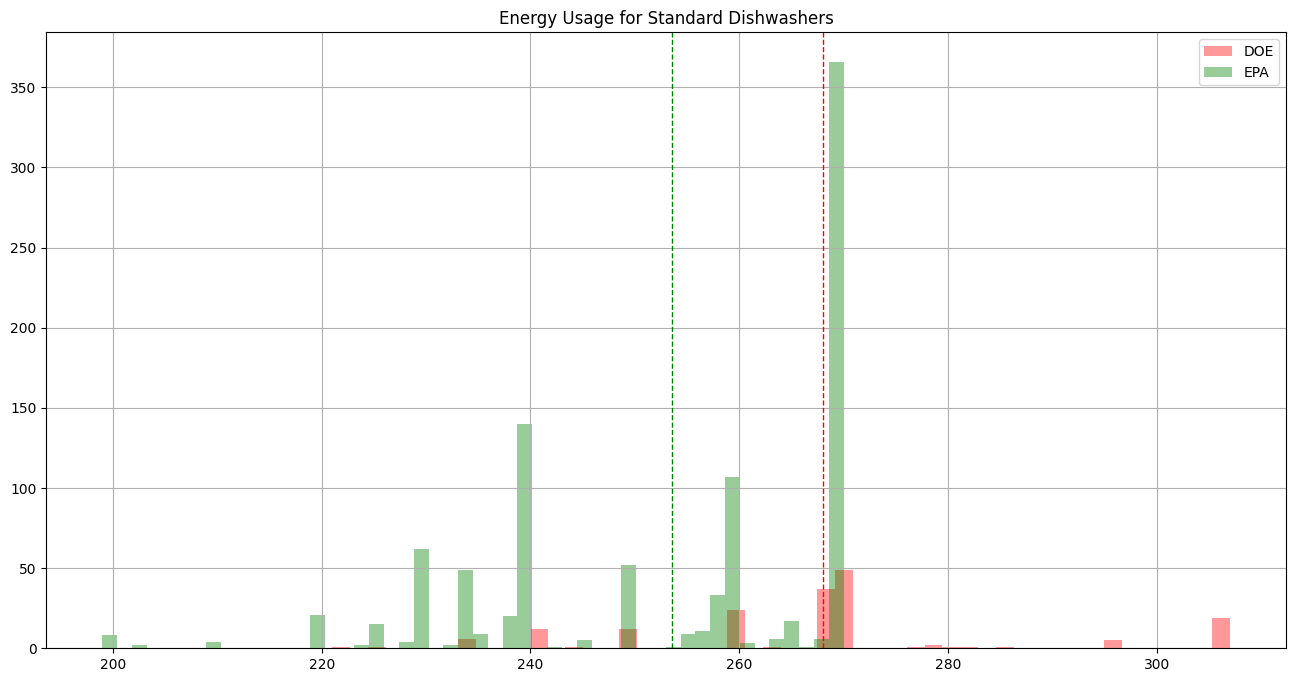

In [18]:
# Plot energy usage for standard dishwashers
display(doe_mepa_standard['Annual_Energy_Use__Kilowatt_Hours_Year__d'].hist(bins=50, figsize=(16, 8), color='red', alpha=0.4, label='DOE'))
display(epa_standard['Annual Energy Use (kWh/yr)'].hist(bins=50, figsize=(16, 8), color='green', alpha=0.4, label='EPA'))

# Add title
plt.title('Energy Usage for Standard Dishwashers')

# Add legend
plt.legend()

# Add average lines
plt.axvline(doe_mepa_standard['Annual_Energy_Use__Kilowatt_Hours_Year__d'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(epa_standard['Annual Energy Use (kWh/yr)'].mean(), color='green', linestyle='dashed', linewidth=1)



## Compact Dishwashers

In [19]:
print(f"The average energy usage for Energy Star certified compact dishwashers is {epa_compact['Annual Energy Use (kWh/yr)'].mean():.2f} kWh/yr")
display(epa_compact['Annual Energy Use (kWh/yr)'].describe())

print(f"The average energy usage for Non-Energy Star certified compact dishwashers is {doe_mepa_compact['Annual_Energy_Use__Kilowatt_Hours_Year__d'].mean():.2f} kWh/yr")
display(doe_mepa_compact['Annual_Energy_Use__Kilowatt_Hours_Year__d'].describe())

The average energy usage for Energy Star certified compact dishwashers is 182.96 kWh/yr


count     51.000000
mean     182.960784
std       26.933222
min      113.000000
25%      155.000000
50%      203.000000
75%      203.000000
max      203.000000
Name: Annual Energy Use (kWh/yr), dtype: float64

The average energy usage for Non-Energy Star certified compact dishwashers is 171.07 kWh/yr


count     28.000000
mean     171.071429
std       42.442055
min      113.000000
25%      130.000000
50%      186.000000
75%      206.000000
max      222.000000
Name: Annual_Energy_Use__Kilowatt_Hours_Year__d, dtype: float64

<Axes: >

<Axes: >

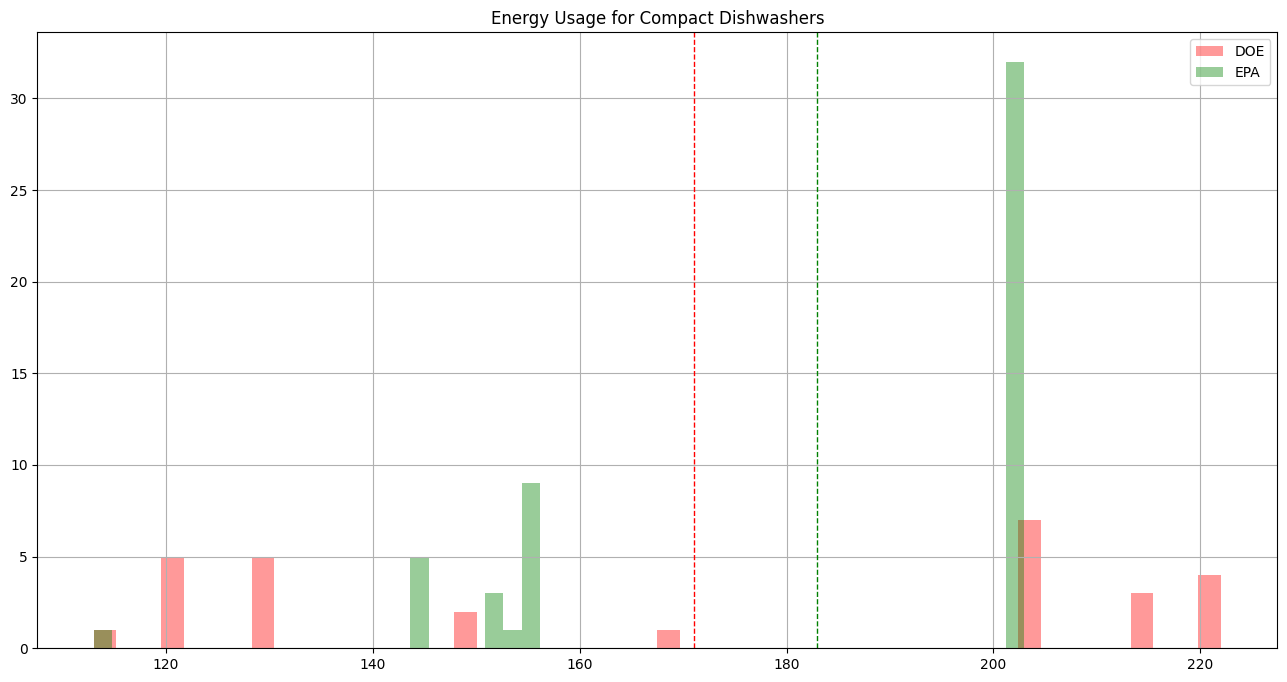

In [20]:
# Plot energy usage for compact dishwashers
display(doe_mepa_compact['Annual_Energy_Use__Kilowatt_Hours_Year__d'].hist(bins=50, figsize=(16, 8), color='red', alpha=0.4, label='DOE'))
display(epa_compact['Annual Energy Use (kWh/yr)'].hist(bins=50, figsize=(16, 8), color='green', alpha=0.4, label='EPA'))

# Add title
plt.title('Energy Usage for Compact Dishwashers')

# Add legend
plt.legend()

# Add average lines
plt.axvline(doe_mepa_compact['Annual_Energy_Use__Kilowatt_Hours_Year__d'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(epa_compact['Annual Energy Use (kWh/yr)'].mean(), color='green', linestyle='dashed', linewidth=1)

# Room AC Analysis

In [21]:
epa_room_ac = pd.read_csv("input_data/epa_room_ac.csv")
doe_room_ac = pd.read_csv("input_data/doe_room_ac.csv")

In [22]:
epa_room_ac.head(1)

display(epa_room_ac.shape)

(1323, 38)

In [23]:
doe_room_ac.head(1)

,Brand_Name_s__s,Product_Group_Code_Description_s,Basic_Model_Number_m,Individual_Model_Number_Covered_by_Basic_Model_m,Cooling_Capacity__BTU_Hour__d,Electrical_Power_Input__Watts__d,Combined_Energy_Efficiency_Ratio_d,Is_the_Certification_for_this_Basic_Model_Based_on_a_Waiver_of_DOE_s_Test_Procedure_Requirements__s,Is_the_Certification_based_upon_any_Exception_Relief_from_an_Applicable_Standard_by_DOE_s_Office_of_Hearing_and_Appeals__s,Link_to_FTC_EnergyGuide_Label_s
0,Midea,"(11) With reverse cycle, with louvered sides, ...",MWCUPWHP-09HEFN8-BCL1,MWCUPWHP-09HEFN8-BCL1,9000.0,760.0,16.0,No,No,By annual report date


In [24]:
doe_room_ac.query("Individual_Model_Number_Covered_by_Basic_Model_m == 'DAC100EB9WDB'")

,Brand_Name_s__s,Product_Group_Code_Description_s,Basic_Model_Number_m,Individual_Model_Number_Covered_by_Basic_Model_m,Cooling_Capacity__BTU_Hour__d,Electrical_Power_Input__Watts__d,Combined_Energy_Efficiency_Ratio_d,Is_the_Certification_for_this_Basic_Model_Based_on_a_Waiver_of_DOE_s_Test_Procedure_Requirements__s,Is_the_Certification_based_upon_any_Exception_Relief_from_an_Applicable_Standard_by_DOE_s_Office_of_Hearing_and_Appeals__s,Link_to_FTC_EnergyGuide_Label_s
1169,Danby,"(3) Without reverse cycle, with louvered sides...",DAC100EB9WDB,DAC100EB9WDB,10000.0,810.0,12.0,No,No,https://www.danby.com/en-us/product-resources/


In [25]:
epa_room_ac = epa_room_ac[[
    'Model Number',
    'Type',
    'Annual Energy Use (kWh/yr)',
]].drop_duplicates()

doe_room_ac = doe_room_ac[[
    'Product_Group_Code_Description_s',
    'Basic_Model_Number_m',
    'Individual_Model_Number_Covered_by_Basic_Model_m'
]].drop_duplicates()

In [26]:
print(epa_room_ac.shape)
print(doe_room_ac.shape)

(1230, 3)
(1837, 3)


In [27]:
print(f"{len(epa_room_ac)/len(doe_room_ac):.2%} ")

66.96% 
